
<div align="center">
    <h1>Atividade 1 - Caio Sousa Mendes </h1>
    <h3>ENGG67- T01 - Tópicos especiais em engenharia de computação </h3>
    <h4>Prof.: Antônio C. L. Fernandes Júnior</h4>
</div>

Para a resolução dos questionamentos utilizaremos bibliotecas como o <b> pandas </b> e o <b> numpy </b> no python para auxliar na analise dos dados. <br>

Abaixo temos a inicialização do banco de dados com uma pré visualização de 10 objetos aleatórios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

atributos = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Variety']

iris =  pd.read_csv(dados, names = atributos)

iris_Variety = iris['Variety']

iris.sample(10)



,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Variety
7,5.0,3.4,1.5,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor
125,7.2,3.2,6.0,1.8,Iris-virginica
61,5.9,3.0,4.2,1.5,Iris-versicolor
5,5.4,3.9,1.7,0.4,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
37,4.9,3.1,1.5,0.1,Iris-setosa


<b> a. Caracterize os dados quanto ao Tipo e Escala</b>
    
     Atributo:     Tipo      -  Escala
    
     sepal.length: Numérico  -  Racional
     sepal.width:  Numérico  -  Racional
     petal.length: Numérico  -  Racional
     petal.width:  Numérico  -  Racional
     Variety:      Categórico - Nominal
    

<b> b. O conjunto de dados é univariado ou multivariado?
    
Multivariado, pois cada objeto tem cinco atributos.
    

<b> c. Verifique a necessidade de balanceamento dos dados e caracterize estatisticamente os
dados
    
 Não há necessidade de balanceamento, pois os objetos estão igualmente distribuidos (50 objetos para cada espécie) do atributo "Variety" (setosa, versicolor e virginica). 
    
    


<b> d. Analise os dados quanto à sua incompletude, inconsistências, redundâncias e presença
de ruído;


Com o método <b>describe()</b> podemos gerar uma tabela com informações resumidas por atributo do banco de dados para análise.

In [2]:
iris.head()

iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A partir da tabela, podemos afirmar sobre:

    Incompletude: Não existe, todos os atributos estão com 150 objetos com valores não nulos.
    
    Inconsistências: Avaliando os valores mínimo e máximo, não há presença de valores negativos por ser unidade de medida. 
    
    Redundancias: Cada atributo fornece uma informação útil e único, então não existe atributos redundantes.
    


Para a presença de ruído, vamos gerar um gráfico de dispersão para os atributos "Sepal_Length" e "Sepal_Width" para análise.

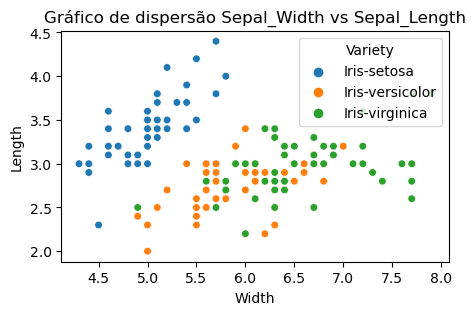

In [3]:
plt.figure(figsize=(5,3))
sns.scatterplot(data = iris, x = 'Sepal_Length', y = 'Sepal_Width', hue = 'Variety', s = 30)
plt.title("Gráfico de dispersão Sepal_Width vs Sepal_Length")
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

    Presença de ruído: A partir do gráfico de dispersão para esse par de atributos, é possivel identificar alguns objetos mais afastados da concentração maior da sua mesma "Variety". Com isso, há indícios de dados ruidosos mas não podemos afirmar com certeza.

<b> e. Promova uma transformação de dados consistente com o banco sob análise

Transformação de dados categóricos para dados numéricos:
    
    Setosa: 0
    Versicolor: 1
    Virginica: 2
    

In [4]:
transformacao = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

iris['Variety_num'] = iris['Variety'].map(transformacao)
iris = iris.drop(columns = 'Variety')
iris.sample(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Variety_num
141,6.9,3.1,5.1,2.3,2
72,6.3,2.5,4.9,1.5,1
22,4.6,3.6,1.0,0.2,0
75,6.6,3.0,4.4,1.4,1
111,6.4,2.7,5.3,1.9,2


<b> f.  Utilize a análise de componentes principais (PCA) para gerar gráficos no espaço de
atributos.

C:\Users\caios\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


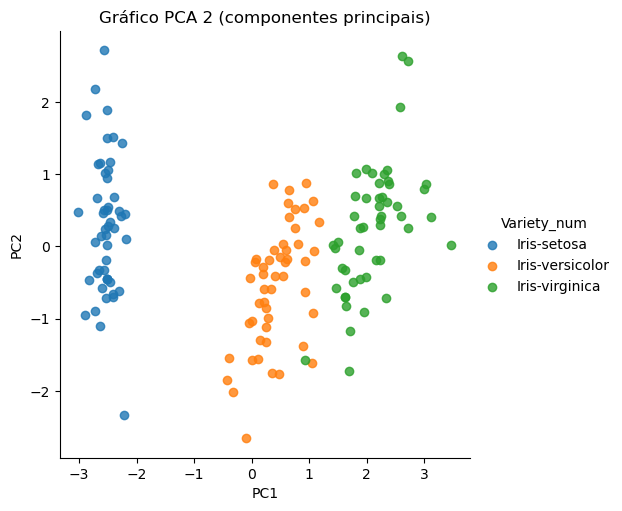

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)

iris_scaled = StandardScaler().fit_transform(iris)

pca_features = pca.fit_transform(iris_scaled)

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

variety_names = {
    0:'Iris-setosa',
    1:'Iris-versicolor', 
    2:'Iris-virginica'
}

pca_df['Variety_num'] = iris['Variety_num'] 
pca_df['Variety_num'] = pca_df['Variety_num'].map(variety_names)


sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='Variety_num', 
    fit_reg=False
    )

plt.title('Gráfico PCA 2 (componentes principais)')
plt.show()